In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
docs = ['python flask docker', 'r analytics', 'python mle docker', 'r statistics analytics', 'python flask django',
       'python django twisted', 'python analytics mle docker']
cout_vectorizer = CountVectorizer(ngram_range=(1,1)) 
vectorized = cout_vectorizer.fit_transform(docs)

In [14]:
cooc = (vectorized.T * vectorized).todense()
G = nx.from_numpy_matrix(cooc)
nx.relabel_nodes(G, {v:k for k,v in cout_vectorizer.vocabulary_.items()}, copy=False)

In [33]:
list(zip((i, label) for i, label in enumerate(cout_vectorizer.get_feature_names())))

[((0, 'analytics'),),
 ((1, 'django'),),
 ((2, 'docker'),),
 ((3, 'flask'),),
 ((4, 'mle'),),
 ((5, 'python'),),
 ((6, 'statistics'),),
 ((7, 'twisted'),)]

/home/jonathan/anaconda3/envs/ml/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


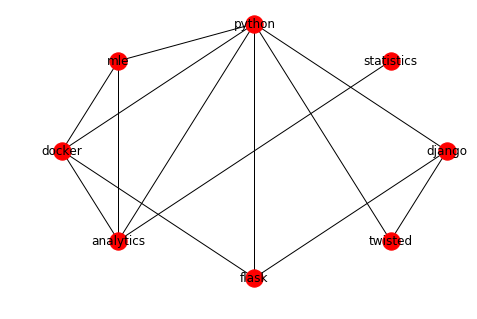

In [15]:
nx.draw(G, nx.circular_layout(G), edges=G.edges, with_labels=True)

In [7]:
cooc

matrix([[3, 0, 1, 0, 1, 1, 1, 0],
        [0, 2, 0, 1, 0, 2, 0, 1],
        [1, 0, 3, 1, 2, 3, 0, 0],
        [0, 1, 1, 2, 0, 2, 0, 0],
        [1, 0, 2, 0, 2, 2, 0, 0],
        [1, 2, 3, 2, 2, 5, 0, 1],
        [1, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [31]:
[(u, v, d) for (u, v, d) in G.edges(data=True)]

highest_weight = np.max(cooc)
node_sizes = [1000 * np.max(row)/highest_weight for row in cooc]

node_sizes

[600.0, 400.0, 600.0, 400.0, 400.0, 1000.0, 200.0, 200.0]

/home/jonathan/anaconda3/envs/ml/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


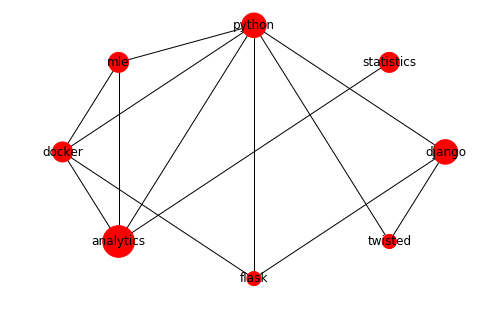

In [32]:
nx.draw(G, nx.circular_layout(G), edges=G.edges, with_labels=True, node_size=node_sizes)

In [27]:
list(nx.algorithms.community.kclique.k_clique_communities(G, 4))

[frozenset({0, 2, 4, 5})]